In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import os
os.chdir('/content/drive/MyDrive/Senior_Thesis_Waseda')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_cluster = pd.read_csv('happiness_data.csv', low_memory=False)
print(df_cluster.head())

   happiness B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  \
0   7.333333             CYP    196070011         6.0          1   
1   8.000000             CYP    196070036         6.0          1   
2   8.000000             CYP    196070039         6.0          1   
3   5.333333             CYP    196070040         6.0          1   
4   4.000000             CYP    196070053         6.0          1   

   H_SETTLEMENT      Cl_1      Cl_2      Cl_3     Cl_4  ...     Cl_67  \
0           4.0  0.936297 -0.623011 -1.308899 -0.65273  ... -1.675059   
1           4.0  0.936297 -0.623011  0.764001 -0.65273  ...  0.580208   
2           4.0  0.936297 -0.623011  0.764001 -0.65273  ...  0.574066   
3           4.0  0.936297 -0.623011  0.764001 -0.65273  ... -0.009851   
4           4.0  0.936297 -0.623011  0.764001 -0.65273  ...  0.507466   

      Cl_68     Cl_69     Cl_70     Cl_71     Cl_72  Cl_73  Cl_74  Cl_75  \
0  0.345000  0.976462 -1.848202 -1.456204  0.884878      2      1      6   


In [ ]:
df_original = pd.read_csv('WVS_Cross-National_Wave_7_inverted_csv_v6_0.csv', low_memory=False)
print(df_original.head())

              version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
1  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
2  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
3  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
4  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0        196             CYP        352         CYP    196070011  ...   
1        196             CYP        352         CYP    196070036  ...   
2        196             CYP        352         CYP    196070039  ...   
3        196             CYP        352         CYP    196070040  ...   
4        196             CYP        352         CYP    196070053  ...   

   WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
0                    

In [ ]:
# Select relevant columns from df_original
df_original_subset = df_original[['D_INTERVIEW', 'Q288', 'Q173P', 'Q270','Q281','Q260','Q289', 'X003R', 'Q273','Q262']]

# Merge df_cluster and df_original_subset on 'D_INTERVIEW'
df = pd.merge(df_cluster, df_original_subset, on='D_INTERVIEW', how='left')

print(df.head())

   happiness B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  \
0   7.333333             CYP    196070011         6.0          1   
1   8.000000             CYP    196070036         6.0          1   
2   8.000000             CYP    196070039         6.0          1   
3   5.333333             CYP    196070040         6.0          1   
4   4.000000             CYP    196070053         6.0          1   

   H_SETTLEMENT      Cl_1      Cl_2      Cl_3     Cl_4  ...  Cl_76  Q288  \
0           4.0  0.936297 -0.623011 -1.308899 -0.65273  ...      3     5   
1           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     5   
2           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     3   
3           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     5   
4           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     3   

   Q173P  Q270  Q281  Q260  Q289  X003R  Q273  Q262  
0      3     2     6     1     3      5     1    61  
1      3     4     8     2

In [ ]:
df_cluster.shape

(97220, 82)

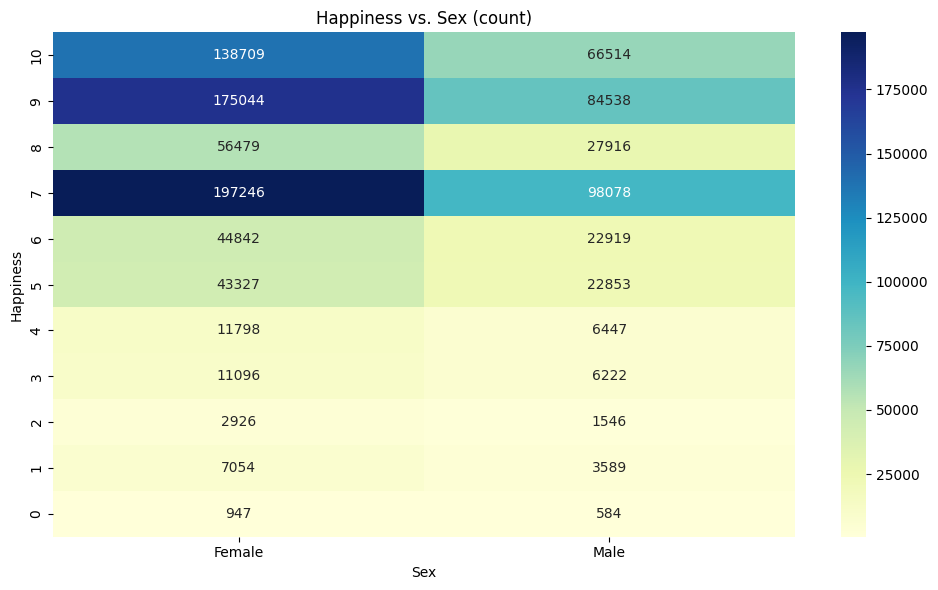

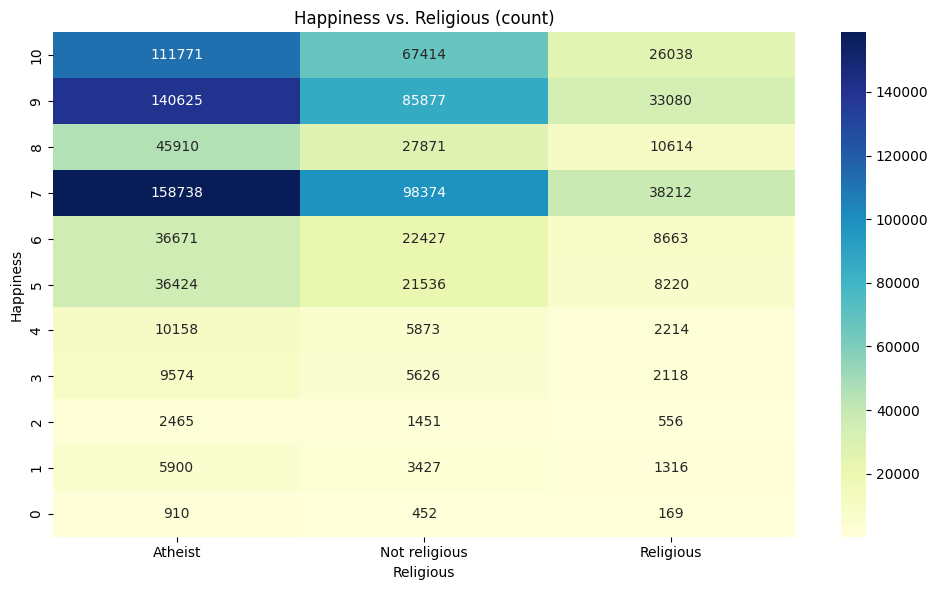

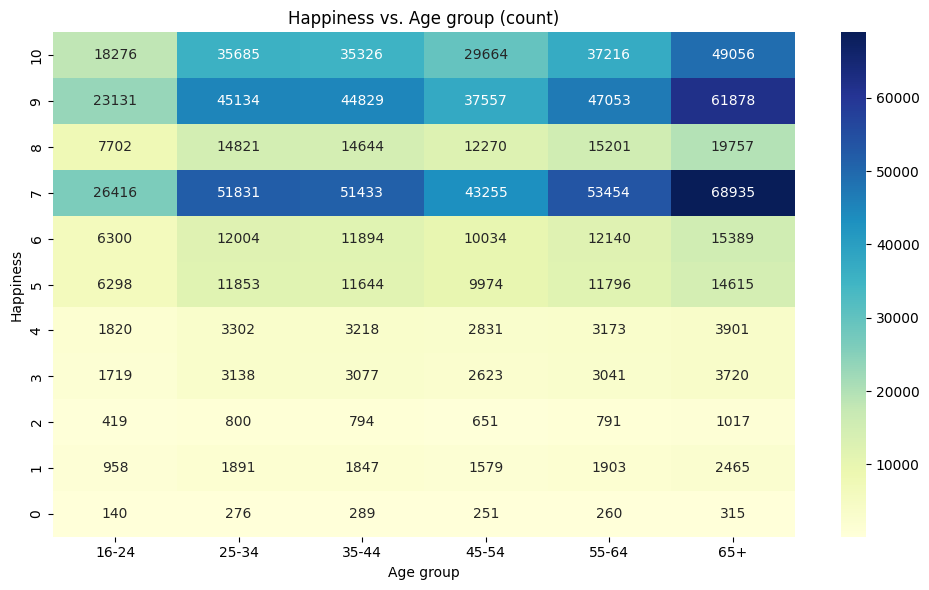

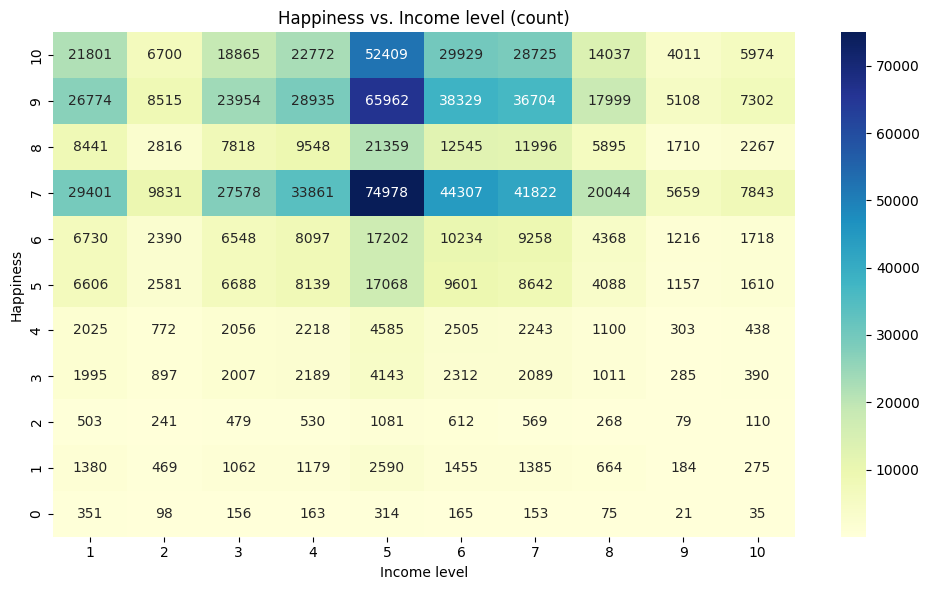

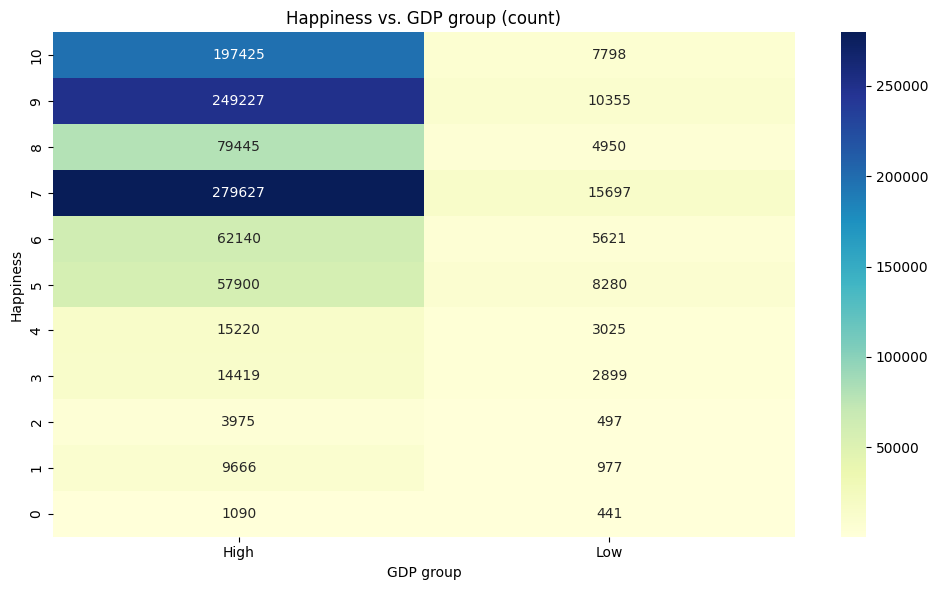

In [ ]:
sex_map = {1: "Male", 2: "Female"}
religious_map = {1: "Religious", 2: "Not religious", 3: "Atheist"}
age_group_map = {
    1: "16-24", 2: "25-34", 3: "35-44",
    4: "45-54", 5: "55-64", 6: "65+"
}
GDP_group_map = {
    0: "Low", 1: "High"}

columns_to_check = ['Q288', 'Q260', 'Q173P', 'X003R', 'happiness', 'GDP group']
df_clean = df[df[columns_to_check].ge(0).all(axis=1)].copy()


df_clean['Sex'] = df_clean['Q260'].map(sex_map)
df_clean['Religious'] = df_clean['Q173P'].map(religious_map)
df_clean['Age group'] = df_clean['X003R'].map(age_group_map)
df_clean['GDP group'] = df_clean['GDP group'].map(GDP_group_map)
df_clean['Income level'] = df_clean['Q288']

df_clean['happiness_rounded'] = df_clean['happiness'].round().astype(int)

def plot_heatmap(df, category_column, value_column='happiness_rounded', aggfunc='count'):
    if aggfunc == 'count':
        heatmap_data = pd.crosstab(df[value_column], df[category_column])
    else:
        heatmap_data = pd.pivot_table(df, index=value_column, columns=category_column, values='happiness', aggfunc=aggfunc)

    heatmap_data = heatmap_data.sort_index(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.0f' if aggfunc == 'count' else '.2f', cmap='YlGnBu')
    plt.title(f"Happiness vs. {category_column} ({aggfunc})")
    plt.xlabel(category_column)
    plt.ylabel("Happiness")
    plt.tight_layout()
    plt.show()

category_columns = ['Sex', 'Religious', 'Age group', 'Income level', 'GDP group']
for col in category_columns:
    plot_heatmap(df_clean, category_column=col, aggfunc='count')


Base

In [ ]:
df_cluster.head()

,happiness,B_COUNTRY_ALPHA,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,Cl_4,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,7.333333,CYP,196070011,6.0,1,4.0,0.936297,-0.623011,-1.308899,-0.65273,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,8.000000,CYP,196070036,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,8.000000,CYP,196070039,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,5.333333,CYP,196070040,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,4.000000,CYP,196070053,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [ ]:
df_cluster.shape

(97220, 82)

In [ ]:
df_cluster.describe()

,happiness,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,Cl_4,Cl_5,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
count,97220.000000,9.722000e+04,95941.000000,97220.00000,97008.000000,9.722000e+04,9.722000e+04,9.722000e+04,9.722000e+04,9.722000e+04,...,9.722000e+04,9.722000e+04,9.722000e+04,9.722000e+04,9.722000e+04,9.722000e+04,97220.000000,97220.000000,97220.000000,97220.000000
mean,6.901159,4.479431e+08,5.280130,0.35108,3.099930,1.034899e-16,-9.355016e-18,2.151654e-16,5.613010e-17,-3.858944e-17,...,5.554541e-17,7.834826e-17,-9.121141e-17,1.356477e-16,-1.403252e-17,2.806505e-17,1.452232,2.666344,3.894034,2.847449
std,2.082020,2.564912e+08,2.437484,0.47731,1.494518,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,8.302801e-01,...,6.634751e-01,4.121133e-01,7.905322e-01,7.964865e-01,8.006698e-01,7.950369e-01,0.553620,2.148665,3.041294,2.570582
min,0.000000,2.007000e+07,1.000000,0.00000,1.000000,-1.068037e+00,-6.230114e-01,-1.308899e+00,-6.527303e-01,-1.884875e+00,...,-1.675059e+00,-1.862907e+00,-1.363443e+00,-1.848202e+00,-1.456204e+00,-1.602317e+00,1.000000,1.000000,0.000000,0.000000
25%,6.000000,2.180700e+08,3.000000,0.00000,2.000000,-1.068037e+00,-6.230114e-01,-1.308899e+00,-6.527303e-01,-5.256576e-01,...,-4.624701e-01,-2.603992e-01,-7.687871e-01,-5.879459e-01,-2.725628e-01,-3.587197e-01,1.000000,1.000000,1.000000,1.000000
50%,7.333333,4.220707e+08,6.000000,0.00000,3.000000,9.362974e-01,-6.230114e-01,7.640007e-01,-6.527303e-01,5.548992e-01,...,1.969870e-03,-2.364188e-02,9.662320e-02,-1.120244e-01,-2.678743e-01,2.573067e-01,1.000000,1.000000,4.000000,2.000000
75%,8.666667,6.880703e+08,8.000000,1.00000,5.000000,9.362974e-01,1.605107e+00,7.640007e-01,1.532026e+00,5.548992e-01,...,4.535958e-01,2.463572e-01,6.863474e-01,3.638971e-01,9.157669e-01,8.848777e-01,2.000000,5.000000,6.000000,5.000000
max,10.000000,9.090704e+08,8.000000,1.00000,5.000000,9.362974e-01,1.605107e+00,7.640007e-01,1.532026e+00,5.548992e-01,...,1.698629e+00,1.679720e+00,9.764615e-01,1.945868e+00,9.157669e-01,8.848777e-01,3.000000,6.000000,11.000000,9.000000


/tmp/ipython-input-11-4015640237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q288'] = pd.to_numeric(df_filtered['Q288'], errors='coerce')
/tmp/ipython-input-11-4015640237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Q288'], inplace=True)


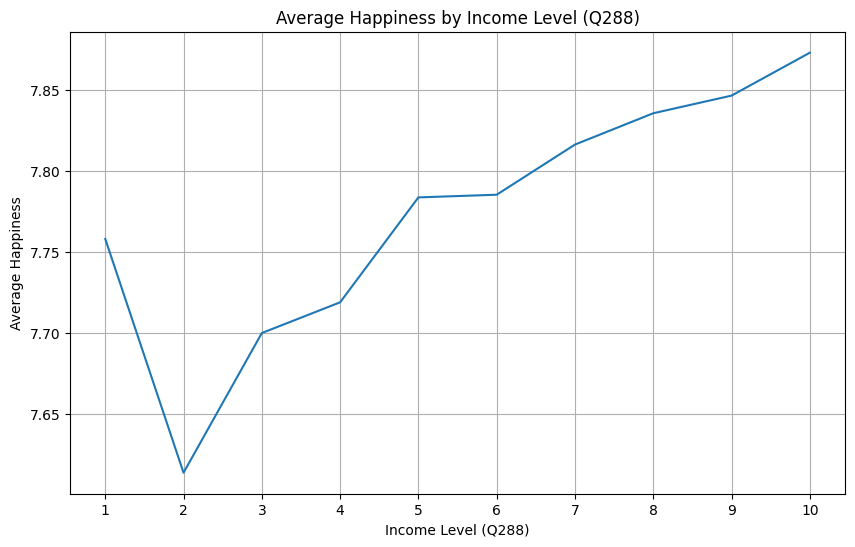

In [ ]:
# Filter out invalid values for Q288
df_filtered = df[~df['Q288'].isin([-1, -2, -5])]

# Convert Q288 to numeric, coercing errors to NaN
df_filtered['Q288'] = pd.to_numeric(df_filtered['Q288'], errors='coerce')

# Drop rows where Q288 conversion resulted in NaN
df_filtered.dropna(subset=['Q288'], inplace=True)

# Calculate the average happiness for each income level (Q288)
average_happiness_by_income = df_filtered.groupby('Q288')['happiness'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_happiness_by_income, x='Q288', y='happiness')
plt.title('Average Happiness by Income Level (Q288)')
plt.xlabel('Income Level (Q288)')
plt.ylabel('Average Happiness')
plt.xticks(average_happiness_by_income['Q288']) # Ensure all income levels are shown on the x-axis
plt.grid(True)
plt.show()


/tmp/ipython-input-12-2071869779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_gender['Q260'] = pd.to_numeric(df_filtered_gender['Q260'], errors='coerce')
/tmp/ipython-input-12-2071869779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_gender.dropna(subset=['Q260'], inplace=True)


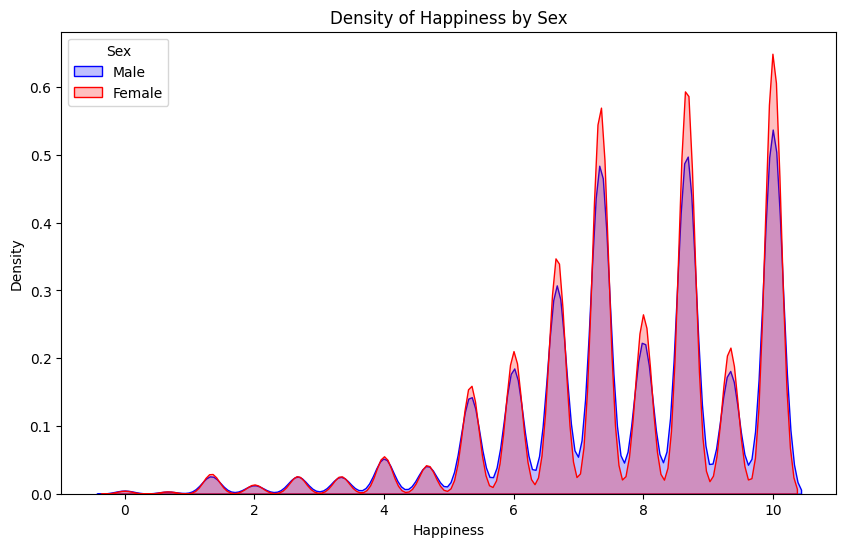

In [ ]:
df_filtered_gender = df[~df['Q260'].isin([-1, -2, -5])]
df_filtered_gender['Q260'] = pd.to_numeric(df_filtered_gender['Q260'], errors='coerce')
df_filtered_gender.dropna(subset=['Q260'], inplace=True)

# split data
male_data = df_filtered_gender[df_filtered_gender['Q260'] == 1]
female_data = df_filtered_gender[df_filtered_gender['Q260'] == 2]

# plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=male_data, x='happiness', fill=True, color='blue', label='Male')
sns.kdeplot(data=female_data, x='happiness', fill=True, color='red', label='Female')

plt.title('Density of Happiness by Sex')
plt.xlabel('Happiness')
plt.ylabel('Density')
plt.legend(title='Sex')
plt.show()


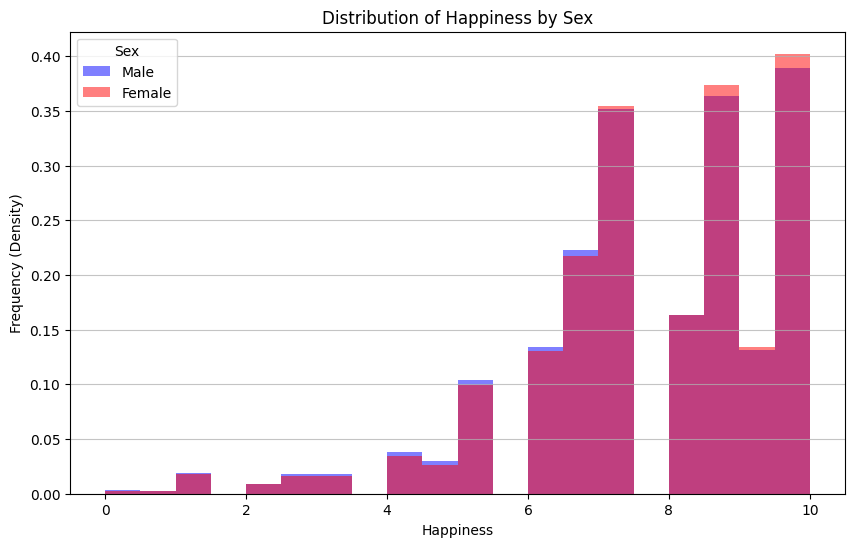

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(male_data['happiness'], bins=20, color='blue', alpha=0.5, label='Male', density=True)
plt.hist(female_data['happiness'], bins=20, color='red', alpha=0.5, label='Female', density=True)

plt.title('Distribution of Happiness by Sex')
plt.xlabel('Happiness')
plt.ylabel('Frequency (Density)')
plt.legend(title='Sex')
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipython-input-14-3886012051.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_education['Q262'] = pd.to_numeric(df_filtered_education['Q262'], errors='coerce')
/tmp/ipython-input-14-3886012051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_education.dropna(subset=['Q262'], inplace=True)


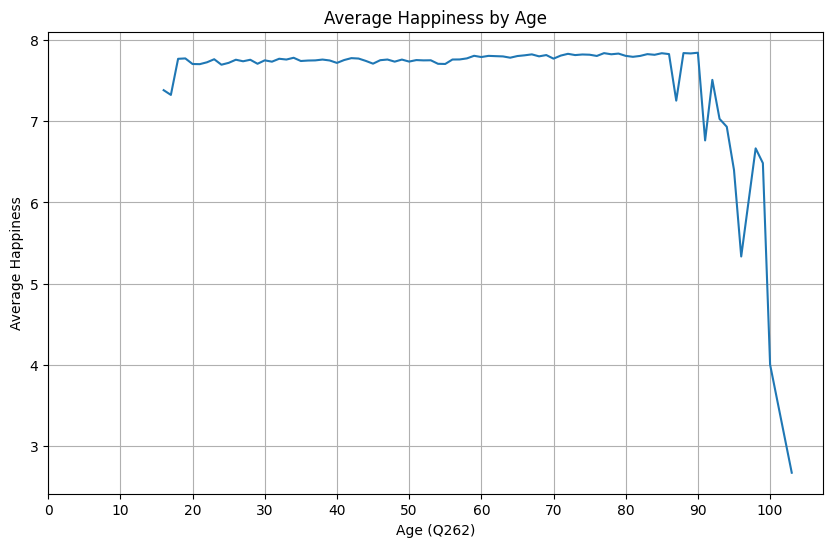

In [ ]:
# Filter out invalid values for Q262
df_filtered_education = df[~df['Q262'].isin([-1, -2, -3, -4, -5])]

# Convert Q262 to numeric, coercing errors to NaN
df_filtered_education['Q262'] = pd.to_numeric(df_filtered_education['Q262'], errors='coerce')

# Drop rows where Q262 conversion resulted in NaN
df_filtered_education.dropna(subset=['Q262'], inplace=True)

# Calculate the average happiness for each education level (Q262)
average_happiness_by_education = df_filtered_education.groupby('Q262')['happiness'].mean().reset_index()

# Plot the data with x-axis in intervals of 10
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_happiness_by_education, x='Q262', y='happiness')
plt.title('Average Happiness by Age')
plt.xlabel('Age (Q262)')
plt.ylabel('Average Happiness')
plt.xticks(range(0, int(average_happiness_by_education['Q262'].max()) + 1, 10))  # Set x-axis ticks at intervals of 10
plt.grid(True)
plt.show()

In [ ]:
# GDP
gdp = pd.read_csv('GDP_per_capita_2022.csv')
gdp.head()

,Country Name,Country Code,GDP per capita 2022,High,GDP Rank,Unnamed: 5,Unnamed: 6
0,Ireland,NIR,106194.75590,1,1,NaN,NaN
1,Singapore,SGP,88428.70242,1,2,NaN,NaN
2,United States,USA,78035.17536,1,3,NaN,NaN
3,Australia,AUS,64997.01365,1,4,NaN,NaN
4,Netherlands,NLD,59123.31856,1,5,NaN,NaN


In [ ]:
df = pd.merge(df, gdp[['Country Code', 'GDP per capita 2022']], left_on='B_COUNTRY_ALPHA', right_on='Country Code', how='left')

# Rename the '2022' column
df.rename(columns={'2022': 'GDP_per_capita_2022'}, inplace=True)

# Drop 'Country Code' column
df.drop('Country Code', axis=1, inplace=True)

print(df.head())

   happiness B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  \
0   7.333333             CYP    196070011         6.0          1   
1   8.000000             CYP    196070036         6.0          1   
2   8.000000             CYP    196070039         6.0          1   
3   5.333333             CYP    196070040         6.0          1   
4   4.000000             CYP    196070053         6.0          1   

   H_SETTLEMENT      Cl_1      Cl_2      Cl_3     Cl_4  ...  Cl_76  Q288  \
0           4.0  0.936297 -0.623011 -1.308899 -0.65273  ...      3     5   
1           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     5   
2           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     3   
3           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     5   
4           4.0  0.936297 -0.623011  0.764001 -0.65273  ...      3     3   

   Q173P  Q270  Q260  Q289  X003R  Q273  Q262  GDP per capita 2022  
0      3     2     1     3      5     1    61          33938.9453

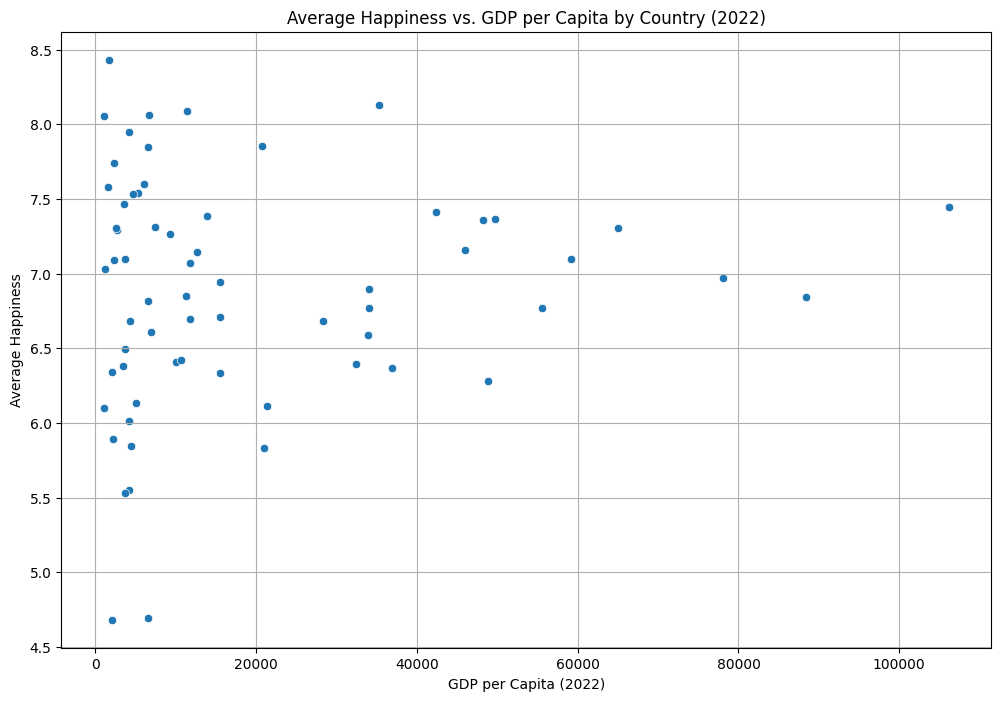

In [ ]:
# Filter out rows where GDP per capita is missing
df_filtered_gdp = df.dropna(subset=['GDP per capita 2022'])

average_happiness_by_country = df_filtered_gdp.groupby('B_COUNTRY_ALPHA')['happiness'].mean().reset_index()

# Merge this average happiness with the GDP data
country_gdp_happiness = pd.merge(average_happiness_by_country, df_filtered_gdp[['B_COUNTRY_ALPHA', 'GDP per capita 2022']].drop_duplicates(), on='B_COUNTRY_ALPHA', how='inner')

# Plot the average happiness per country vs. GDP per capita
plt.figure(figsize=(12, 8))
sns.scatterplot(data=country_gdp_happiness, x='GDP per capita 2022', y='happiness')
plt.title('Average Happiness vs. GDP per Capita by Country (2022)')
plt.xlabel('GDP per Capita (2022)')
plt.ylabel('Average Happiness')
plt.grid(True)
plt.show()

/tmp/ipython-input-18-2398019770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_religion['Q173P'] = pd.to_numeric(df_filtered_religion['Q173P'], errors='coerce')
/tmp/ipython-input-18-2398019770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_religion.dropna(subset=['Q173P'], inplace=True)


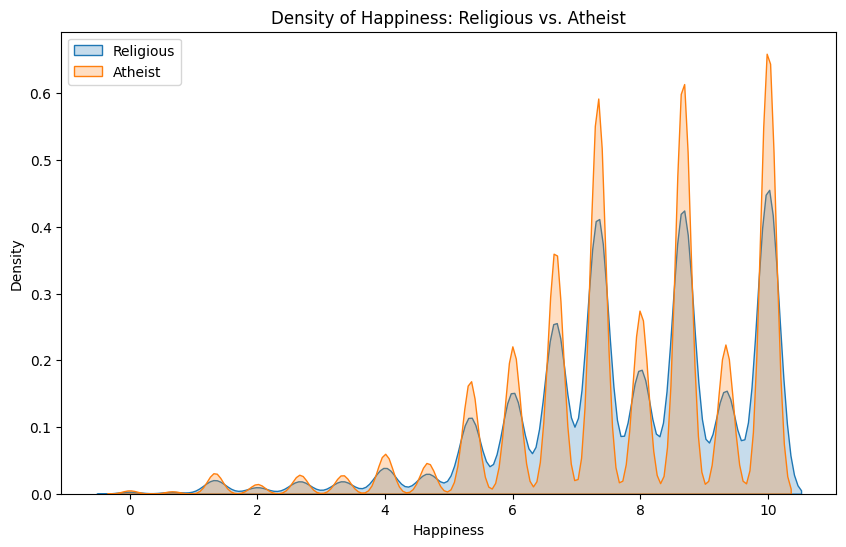

In [ ]:
# Filter out invalid values for Q173P
df_filtered_religion = df[~df['Q173P'].isin([-1, -2, -5])]

# Convert Q173P to numeric, coercing errors to NaN
df_filtered_religion['Q173P'] = pd.to_numeric(df_filtered_religion['Q173P'], errors='coerce')

# Drop rows where Q173P conversion resulted in NaN
df_filtered_religion.dropna(subset=['Q173P'], inplace=True)

# Define religious (Q173P == 1) and atheist (Q173P == 2 or 3)
religious_df = df_filtered_religion[df_filtered_religion['Q173P'] == 1]
atheist_df = df_filtered_religion[df_filtered_religion['Q173P'].isin([2, 3])]

# Plot density of happiness for religious and atheist groups
plt.figure(figsize=(10, 6))
sns.kdeplot(data=religious_df, x='happiness', fill=True, label='Religious')
sns.kdeplot(data=atheist_df, x='happiness', fill=True, label='Atheist')
plt.title('Density of Happiness: Religious vs. Atheist')
plt.xlabel('Happiness')
plt.ylabel('Density')
plt.legend()
plt.show()

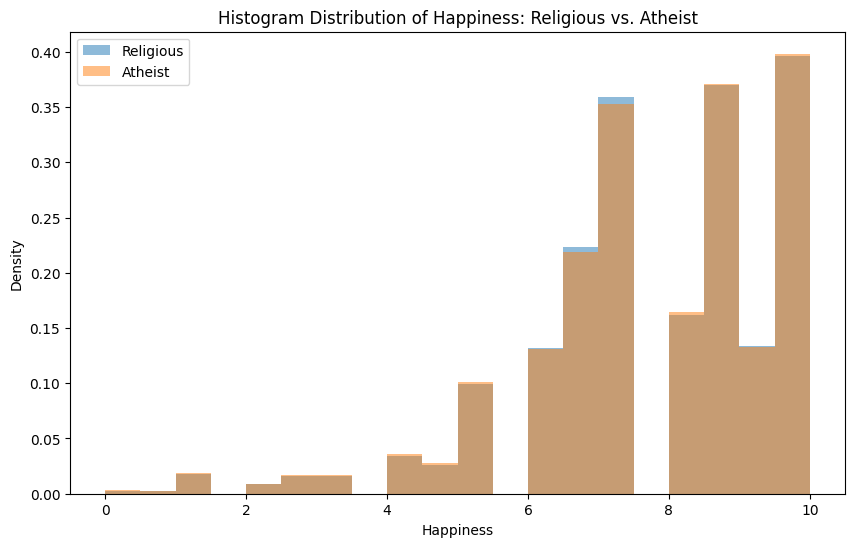

In [ ]:
# Plot histogram of happiness for religious and atheist groups with transparent colors
plt.figure(figsize=(10, 6))
plt.hist(religious_df['happiness'], bins=20, alpha=0.5, label='Religious', density=True)
plt.hist(atheist_df['happiness'], bins=20, alpha=0.5, label='Atheist', density=True)
plt.title('Histogram Distribution of Happiness: Religious vs. Atheist')
plt.xlabel('Happiness')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
df.head()

,happiness,B_COUNTRY_ALPHA,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,Cl_4,...,Cl_76,Q288,Q173P,Q270,Q260,Q289,X003R,Q273,Q262,GDP per capita 2022
0,7.333333,CYP,196070011,6.0,1,4.0,0.936297,-0.623011,-1.308899,-0.65273,...,3,5,3,2,1,3,5,1,61,33938.94531
1,8.000000,CYP,196070036,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,3,5,3,4,2,3,5,1,61,33938.94531
2,8.000000,CYP,196070039,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,3,3,3,6,2,3,3,1,42,33938.94531
3,5.333333,CYP,196070040,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,3,5,3,2,2,3,5,1,64,33938.94531
4,4.000000,CYP,196070053,6.0,1,4.0,0.936297,-0.623011,0.764001,-0.65273,...,3,3,3,8,2,3,4,5,52,33938.94531


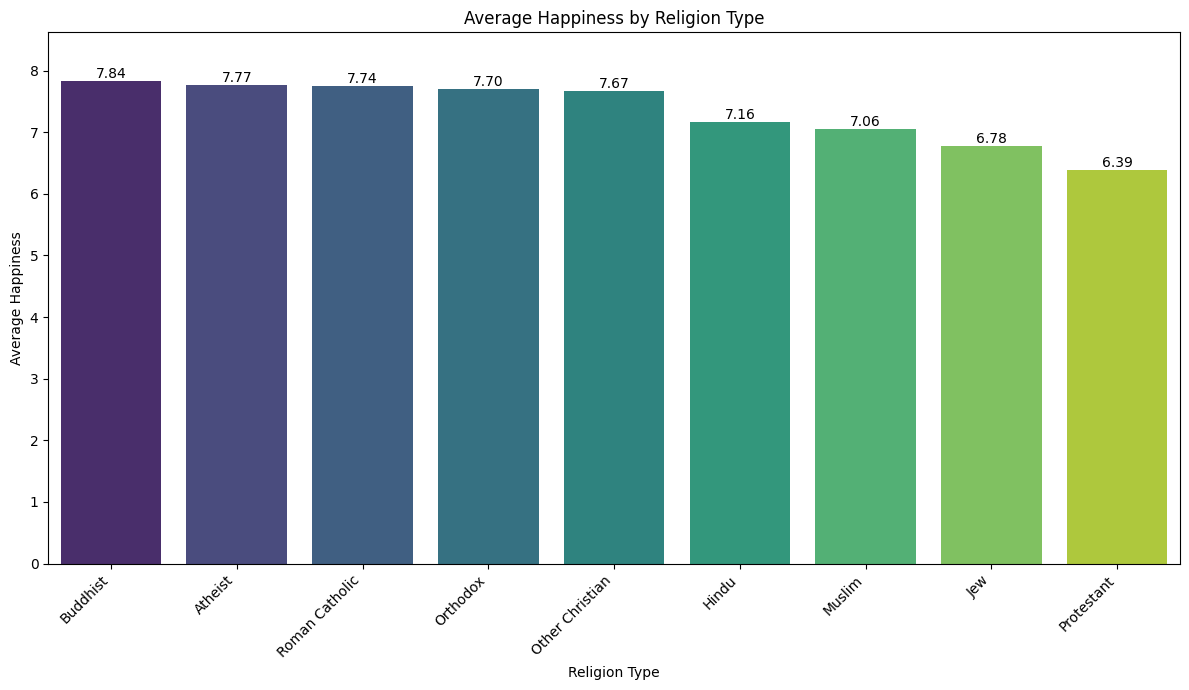

In [ ]:
# Filter out invalid values for Q289
df_filtered_religion_type = df[~df['Q289'].isin([-1, -2, -5])]

# Convert Q289 to numeric, coercing errors to NaN
df_filtered_religion_type['Q289'] = pd.to_numeric(df_filtered_religion_type['Q289'], errors='coerce')

# Drop rows where Q289 conversion resulted in NaN
df_filtered_religion_type.dropna(subset=['Q289'], inplace=True)

# Map numerical Q289 values to religion names
religion_type_map = {
    1: "Atheist",
    2: "Roman Catholic",
    3: "Protestant",
    4: "Orthodox",
    5: "Jew",
    6: "Muslim",
    7: "Hindu",
    8: "Buddhist",
    9: "Other Christian",
    10: "Other"
}
df_filtered_religion_type['Religion Type'] = df_filtered_religion_type['Q289'].map(religion_type_map)

# Calculate the average happiness for each religion type
average_happiness_by_religion_type = df_filtered_religion_type.groupby('Religion Type')['happiness'].mean().reset_index()

# Sort by average happiness for better visualization
average_happiness_by_religion_type = average_happiness_by_religion_type.sort_values('happiness', ascending=False)

# Plot the average happiness for each religion type
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=average_happiness_by_religion_type, x='Religion Type', y='happiness', palette='viridis')
plt.title('Average Happiness by Religion Type')
plt.xlabel('Religion Type')
plt.ylabel('Average Happiness')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, average_happiness_by_religion_type['happiness'].max() * 1.1) # Add some space above the highest bar

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

/tmp/ipython-input-21-2567986219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_religious_denomination['Q289'] = pd.to_numeric(df_filtered_religious_denomination['Q289'], errors='coerce')
/tmp/ipython-input-21-2567986219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_religious_denomination.dropna(subset=['Q289'], inplace=True)
/tmp/ipython-input-21-2567986219.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

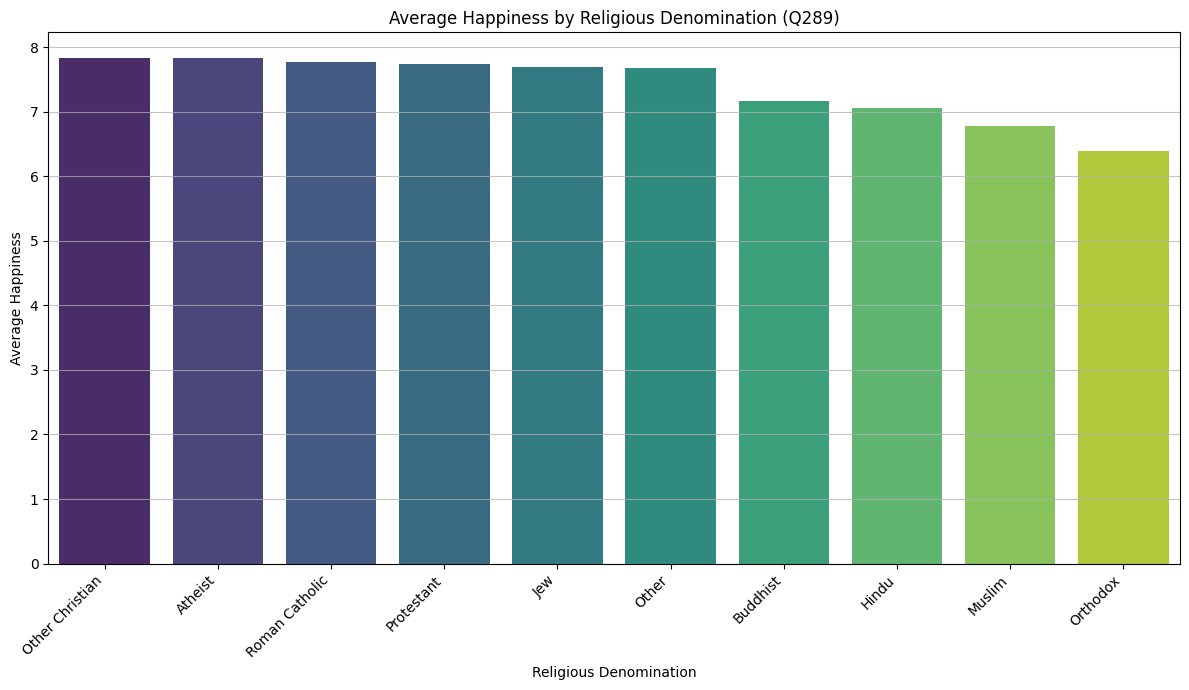

/tmp/ipython-input-21-2567986219.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=denomination_counts, x='Religious Denomination', y='Count', palette='plasma')


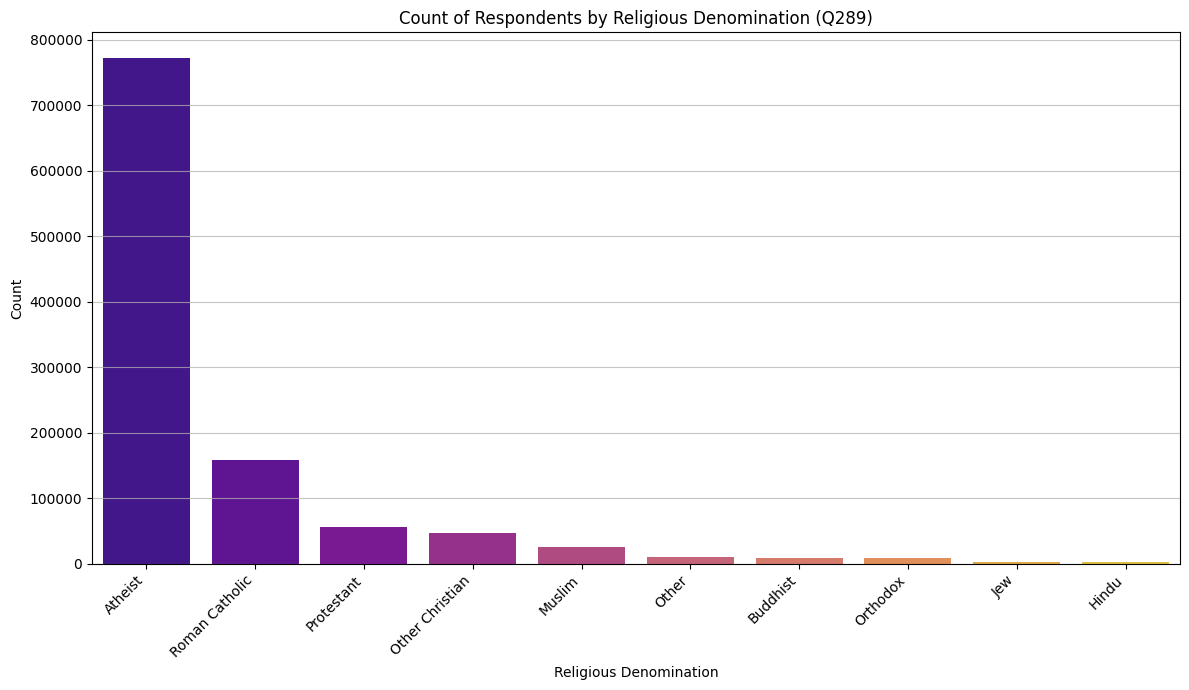

In [ ]:
# Filter out invalid values for Q289
df_filtered_religious_denomination = df[~df['Q289'].isin([-1, -2, -5])]

# Convert Q289 to numeric, coercing errors to NaN
df_filtered_religious_denomination['Q289'] = pd.to_numeric(df_filtered_religious_denomination['Q289'], errors='coerce')

# Drop rows where Q289 conversion resulted in NaN
df_filtered_religious_denomination.dropna(subset=['Q289'], inplace=True)

# Define a mapping for religious denominations
religious_denomination_map = {
    0: "Atheist",
    1: "Roman Catholic",
    2: "Protestant",
    3: "Orthodox",
    4: "Jew",
    5: "Muslim",
    6: "Hindu",
    7: "Buddhist",
    8: "Other Christian",
    9: "Other"
}


# Map the numeric Q289 values to the denomination labels
df_filtered_religious_denomination['Religious Denomination'] = df_filtered_religious_denomination['Q289'].map(religious_denomination_map)

# Calculate the average happiness for each religious denomination
average_happiness_by_denomination = df_filtered_religious_denomination.groupby('Religious Denomination')['happiness'].mean().reset_index()

# Sort by average happiness for better visualization
average_happiness_by_denomination = average_happiness_by_denomination.sort_values(by='happiness', ascending=False)

# Plot the data
plt.figure(figsize=(12, 7))
sns.barplot(data=average_happiness_by_denomination, x='Religious Denomination', y='happiness', palette='viridis')
plt.title('Average Happiness by Religious Denomination (Q289)')
plt.xlabel('Religious Denomination')
plt.ylabel('Average Happiness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Optional: Also plot the count for each denomination to see sample size
denomination_counts = df_filtered_religious_denomination['Religious Denomination'].value_counts().reset_index()
denomination_counts.columns = ['Religious Denomination', 'Count']
denomination_counts = denomination_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(data=denomination_counts, x='Religious Denomination', y='Count', palette='plasma')
plt.title('Count of Respondents by Religious Denomination (Q289)')
plt.xlabel('Religious Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipython-input-33-3656571046.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_marital['Q273'] = pd.to_numeric(df_filtered_marital['Q273'], errors='coerce')
/tmp/ipython-input-33-3656571046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_marital.dropna(subset=['Q273'], inplace=True)
/tmp/ipython-input-33-3656571046.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

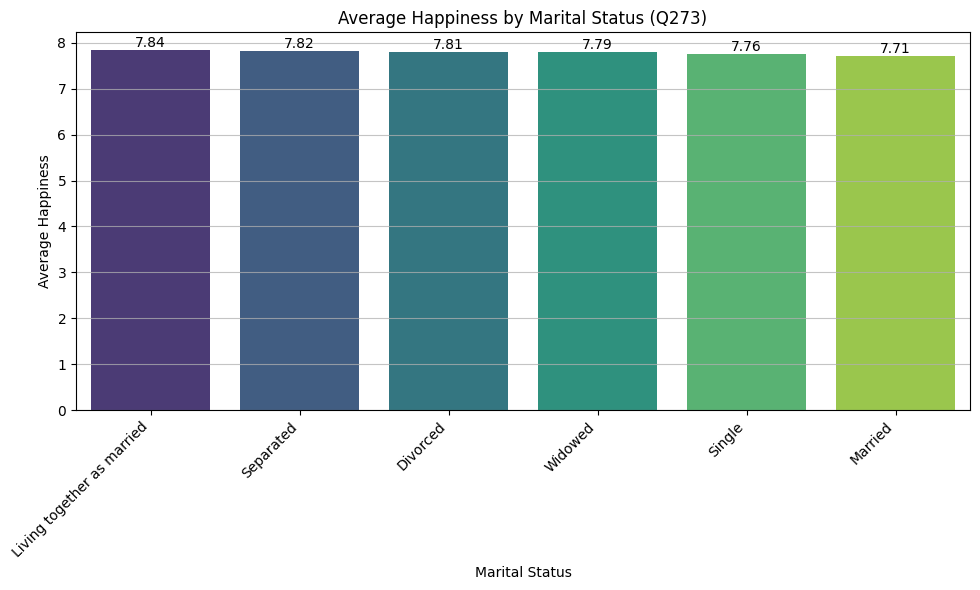

In [ ]:
# Filter out invalid values for Q273
df_filtered_marital = df[~df['Q273'].isin([-1, -2, -5])]

# Convert Q273 to numeric, coercing errors to NaN
df_filtered_marital['Q273'] = pd.to_numeric(df_filtered_marital['Q273'], errors='coerce')

# Drop rows where Q273 conversion resulted in NaN
df_filtered_marital.dropna(subset=['Q273'], inplace=True)

# Define a mapping for marital status
marital_status_map = {
    1: "Married",
    2: "Living together as married",
    3: "Divorced",
    4: "Separated",
    5: "Widowed",
    6: "Single"
}

# Map the numeric Q273 values to the marital status labels
df_filtered_marital['Marital Status'] = df_filtered_marital['Q273'].map(marital_status_map)

# Calculate the average happiness for each marital status
average_happiness_by_marital_status = df_filtered_marital.groupby('Marital Status')['happiness'].mean().reset_index()

# Sort by average happiness for better visualization (optional)
average_happiness_by_marital_status = average_happiness_by_marital_status.sort_values(by='happiness', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_happiness_by_marital_status, x='Marital Status', y='happiness', palette='viridis')
plt.title('Average Happiness by Marital Status (Q273)')
plt.xlabel('Marital Status')
plt.ylabel('Average Happiness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

/tmp/ipython-input-22-1687205109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_marital['Q273'] = pd.to_numeric(df_filtered_marital['Q273'], errors='coerce')
/tmp/ipython-input-22-1687205109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_marital.dropna(subset=['Q273'], inplace=True)
/tmp/ipython-input-22-1687205109.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

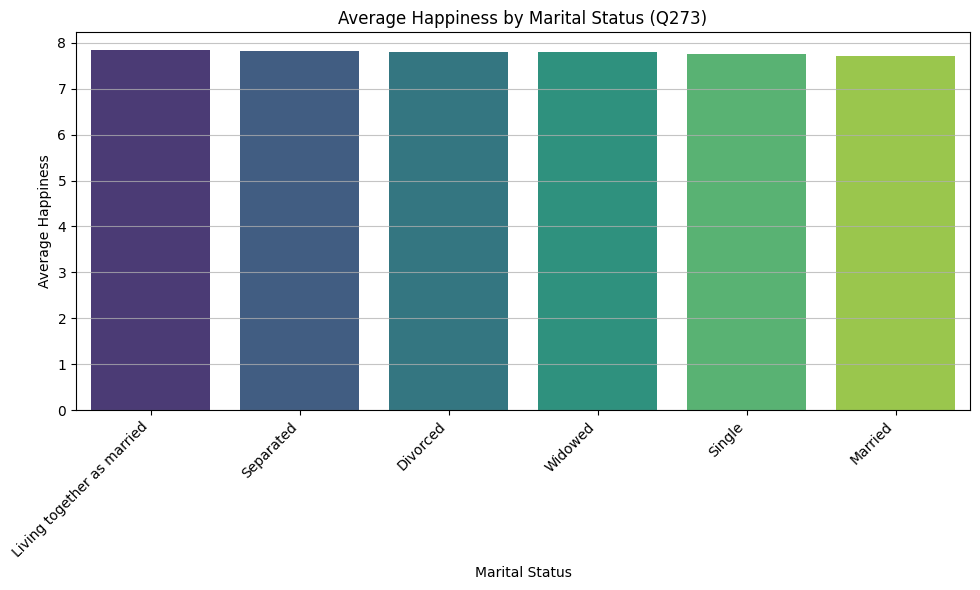

In [ ]:
# Filter out invalid values for Q273
df_filtered_marital = df[~df['Q273'].isin([-1, -2, -5])]

# Convert Q273 to numeric, coercing errors to NaN
df_filtered_marital['Q273'] = pd.to_numeric(df_filtered_marital['Q273'], errors='coerce')

# Drop rows where Q273 conversion resulted in NaN
df_filtered_marital.dropna(subset=['Q273'], inplace=True)

# Define a mapping for marital status
marital_status_map = {
    1: "Married",
    2: "Living together as married",
    3: "Divorced",
    4: "Separated",
    5: "Widowed",
    6: "Single"
}

# Map the numeric Q273 values to the marital status labels
df_filtered_marital['Marital Status'] = df_filtered_marital['Q273'].map(marital_status_map)

# Calculate the average happiness for each marital status
average_happiness_by_marital_status = df_filtered_marital.groupby('Marital Status')['happiness'].mean().reset_index()

# Sort by average happiness for better visualization (optional)
average_happiness_by_marital_status = average_happiness_by_marital_status.sort_values(by='happiness', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=average_happiness_by_marital_status, x='Marital Status', y='happiness', palette='viridis')
plt.title('Average Happiness by Marital Status (Q273)')
plt.xlabel('Marital Status')
plt.ylabel('Average Happiness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
print("Average happiness for Q273 (Marital Status):")
average_happiness_by_marital_status

Average happiness for Q273 (Marital Status):


,Marital Status,happiness
1,Living together as married,7.836085
3,Separated,7.816449
0,Divorced,7.809182
5,Widowed,7.789116
4,Single,7.756313
2,Married,7.706611


/tmp/ipython-input-31-2163786468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_household['Q270'] = pd.to_numeric(df_filtered_household['Q270'], errors='coerce')
/tmp/ipython-input-31-2163786468.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_household.dropna(subset=['Q270'], inplace=True)
/tmp/ipython-input-31-2163786468.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(da

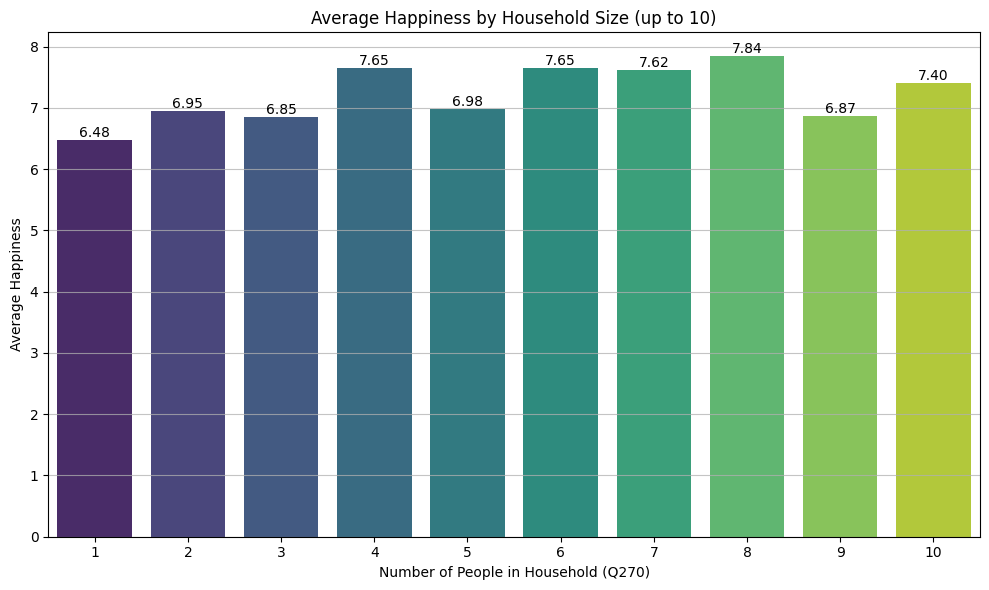

Average happiness for Q270 (Household Size up to 10):


,Q270,happiness
0,1,6.481296
1,2,6.954375
2,3,6.847280
3,4,7.647538
4,5,6.979379
5,6,7.652374
6,7,7.623134
7,8,7.842074
8,9,6.866548
9,10,7.402727


In [ ]:
# Filter out invalid values for Q270 (Household size)
df_filtered_household = df[~df['Q270'].isin([-1, -2, -5])]

# Convert Q270 to numeric, coercing errors to NaN
df_filtered_household['Q270'] = pd.to_numeric(df_filtered_household['Q270'], errors='coerce')

# Drop rows where Q270 conversion resulted in NaN
df_filtered_household.dropna(subset=['Q270'], inplace=True)

# Filter for household sizes up to 10
df_filtered_household_small = df_filtered_household[df_filtered_household['Q270'] <= 10]

# Calculate the average happiness for each household size
average_happiness_by_household_size = df_filtered_household_small.groupby('Q270')['happiness'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_happiness_by_household_size, x='Q270', y='happiness', palette='viridis')
plt.title('Average Happiness by Household Size (up to 10)')
plt.xlabel('Number of People in Household (Q270)')
plt.ylabel('Average Happiness')
plt.xticks(rotation=0) # Ensure x-axis labels are not rotated

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Average happiness for Q270 (Household Size up to 10):")
average_happiness_by_household_size

/tmp/ipython-input-24-3237123003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_household['Q270'] = pd.to_numeric(df_filtered_household['Q270'], errors='coerce')
/tmp/ipython-input-24-3237123003.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_household.dropna(subset=['Q270'], inplace=True)
/tmp/ipython-input-24-3237123003.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=av

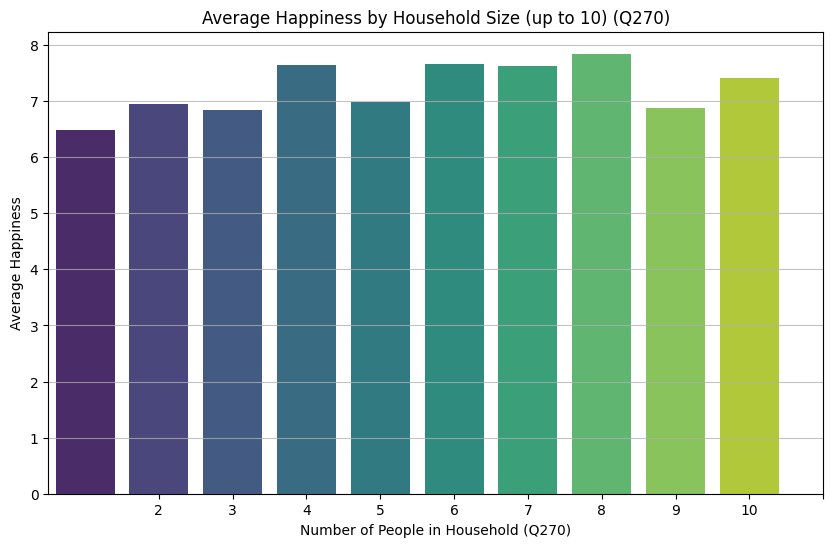

In [ ]:
# Filter out invalid values for Q270
df_filtered_household = df[~df['Q270'].isin([-1, -2, -5])]

# Convert Q270 to numeric, coercing errors to NaN
df_filtered_household['Q270'] = pd.to_numeric(df_filtered_household['Q270'], errors='coerce')

# Drop rows where Q270 conversion resulted in NaN
df_filtered_household.dropna(subset=['Q270'], inplace=True)

# Filter for household sizes up to 10
df_household_limited = df_filtered_household[df_filtered_household['Q270'] <= 10]

# Calculate the average happiness for each household size (up to 10)
average_happiness_by_household_size = df_household_limited.groupby('Q270')['happiness'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=average_happiness_by_household_size, x='Q270', y='happiness', palette='viridis')
plt.title('Average Happiness by Household Size (up to 10) (Q270)')
plt.xlabel('Number of People in Household (Q270)')
plt.ylabel('Average Happiness')
plt.xticks(average_happiness_by_household_size['Q270'])
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipython-input-29-3031982657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_happiness_by_occupation, x='Occupation', y='happiness', palette='viridis')


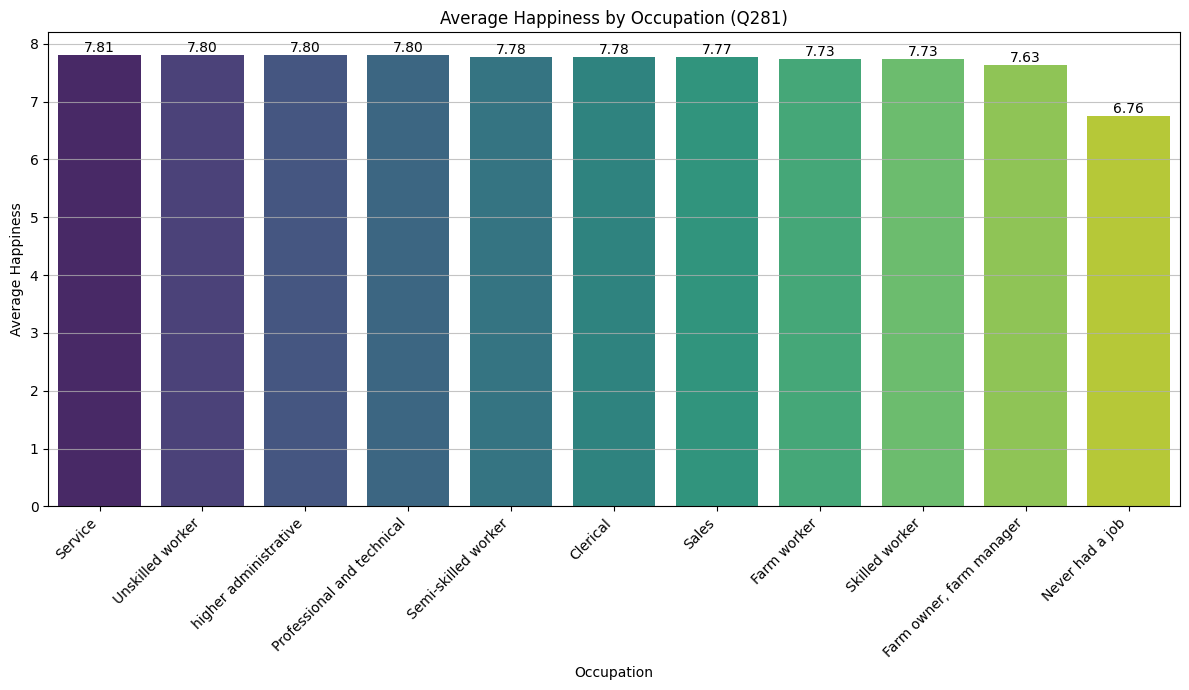

In [ ]:
# Filter out invalid values for Q281 and happiness
df_filtered_occupation = df[~df['Q281'].isin([-1, -2, -5])]
df_filtered_occupation = df_filtered_occupation[~df_filtered_occupation['happiness'].isin([-1, -2, -5])]

# Convert Q281 to numeric, coercing errors to NaN
df_filtered_occupation['Q281'] = pd.to_numeric(df_filtered_occupation['Q281'], errors='coerce')

# Drop rows where Q281 or happiness conversion resulted in NaN
df_filtered_occupation.dropna(subset=['Q281', 'happiness'], inplace=True)

# Define a mapping for occupation categories
occupation_map = {
    0: "Never had a job",
    1: "Professional and technical",
    2: "higher administrative",
    3: "Clerical",
    4: "Sales",
    5: "Service",
    6: "Skilled worker",
    7: "Semi-skilled worker",
    8: "Unskilled worker",
    9: "Farm worker",
    10: "Farm owner, farm manager"
}

# Map the numeric Q281 values to the occupation labels
df_filtered_occupation['Occupation'] = df_filtered_occupation['Q281'].map(occupation_map)

# Calculate the average happiness for each occupation category
average_happiness_by_occupation = df_filtered_occupation.groupby('Occupation')['happiness'].mean().reset_index()

# Sort by average happiness for better visualization
average_happiness_by_occupation = average_happiness_by_occupation.sort_values(by='happiness', ascending=False)

# Plot the data
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=average_happiness_by_occupation, x='Occupation', y='happiness', palette='viridis')
plt.title('Average Happiness by Occupation (Q281)')
plt.xlabel('Occupation')
plt.ylabel('Average Happiness')
plt.xticks(rotation=45, ha='right')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()
